# Chapter 1: Thinking Probabilistically

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import preliz as pz

## Exercise 2

Previously, we defined a Python function P to compute the probability of an event 
using the naive definition of probability. Generalize that function to compute the
probability of events when they are not all equally likely. Use this new function to
compute the probability of events 𝐴 and 𝐵 from the previous exercise. Hint: you can
pass a third argument with the probability of each event.

In [2]:
# Previous function


def P(S, A):
    if set(A).issubset(set(S)):
        return len(A) / len(S)
    else:
        return 0

In [3]:
# Exercise solution


def P(sample_space_probas: dict[str, float], events: set):
    if events.issubset(sample_space_probas.keys()):
        return sum([sample_space_probas[event] for event in events])
    else:
        return 0


sample_space_probas = {"s": 0.5, "b": 0.25, "c": 0.25}

In [4]:
events = {"s"}
P(sample_space_probas, events)

0.5

In [5]:
events = {"s", "b"}
P(sample_space_probas, events)

0.75

## Exercise 7

In [6]:
mean = 0
variance = 2
skewness = 3
skew_normal = pz.SkewNormal(
    mu=mean,
    sigma=variance,
    alpha=skewness,
)

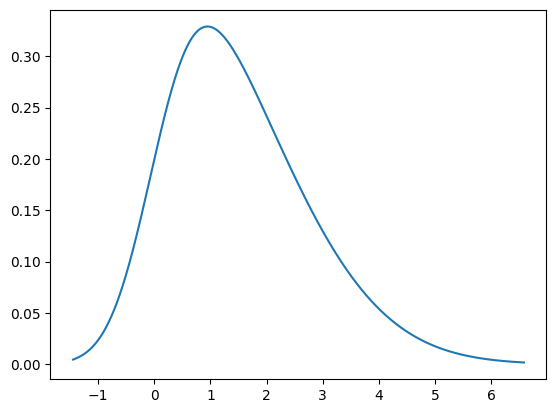

In [7]:
# Visualize the original distribution
x = np.linspace(skew_normal.ppf(0.001), skew_normal.ppf(0.999), 1000)
plt.plot(x, skew_normal.pdf(x));

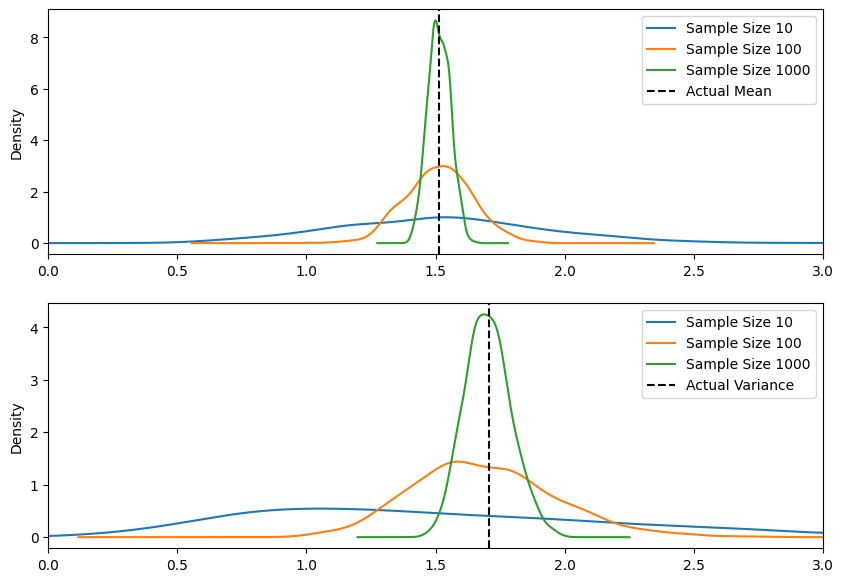

In [8]:
# Sample sizes to test
sample_sizes = [10, 100, 1000]
num_samples = 1000

actual_mean, actual_variance = skew_normal.rv_frozen.stats("mv")

_, ax = plt.subplots(2, 1, figsize=(10, 7))

sample_variances = []
for sample_size in sample_sizes:
    samples = skew_normal.rvs((num_samples, sample_size))

    pd.Series(samples.mean(axis=1)).plot.kde(
        label=f"Sample Size {sample_size}", ax=ax[0]
    )
    pd.Series(samples.var(axis=1)).plot.kde(
        label=f"Sample Size {sample_size}", ax=ax[1]
    )

ax[0].axvline(
    actual_mean, color="black", linestyle="dashed", label=f"Actual Mean"
)
ax[1].axvline(
    actual_variance,
    color="black",
    linestyle="dashed",
    label=f"Actual Variance",
)
ax[0].set_xlim(0, 3)
ax[1].set_xlim(0, 3)
ax[0].legend()
ax[1].legend();

**Key Observations**
1. Larger sample sizes lead to more accurate estimates with less uncertainty.
2. The Law of Large Numbers (LLN) ensures convergence to the true mean, while the Central Limit Theorem (CLT) makes the sample mean distribution approximately normal, even if the original distribution is skewed.  

## Exercise 8

In [9]:
mean = 0
variance = 2
degrees_of_freedom = [2, 3, 500]

student_ts = [
    pz.StudentT(
        nu=dof,
        mu=mean,
        sigma=variance,
    )
    for dof in degrees_of_freedom
]

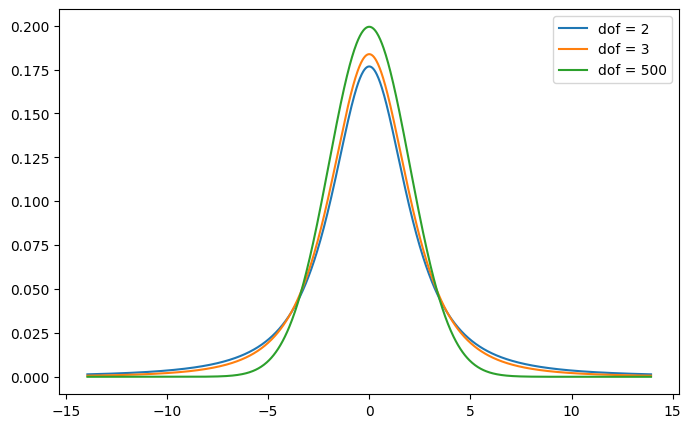

In [10]:
x = np.linspace(
    min(st.ppf(0.01) for st in student_ts),
    max(st.ppf(0.99) for st in student_ts),
    1000,
)

plt.figure(figsize=(8, 5))
for student_t, dof in zip(student_ts, degrees_of_freedom):
    plt.plot(x, student_t.pdf(x), label=f"dof = {dof}")
plt.legend();

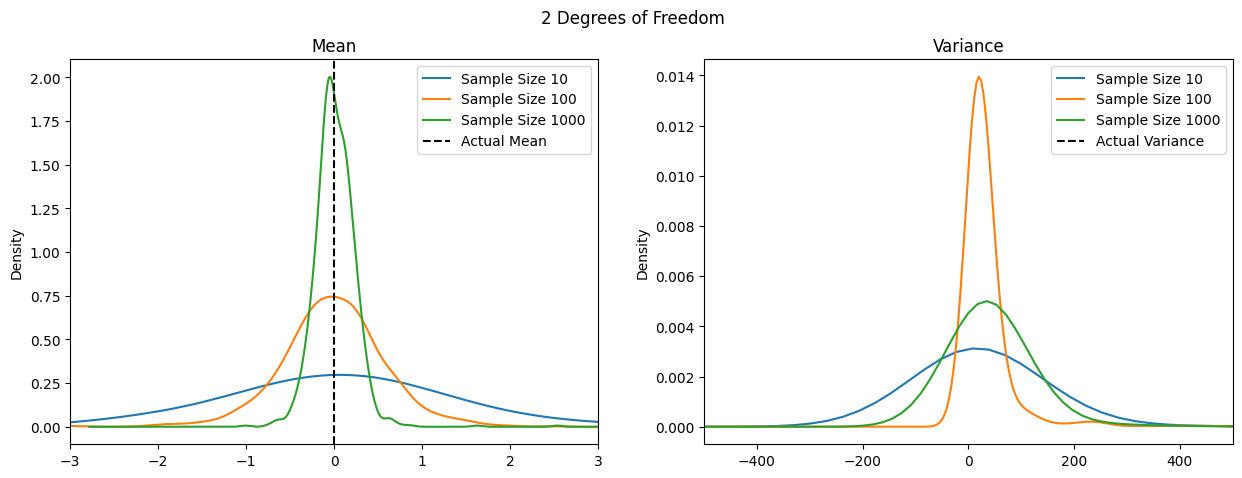

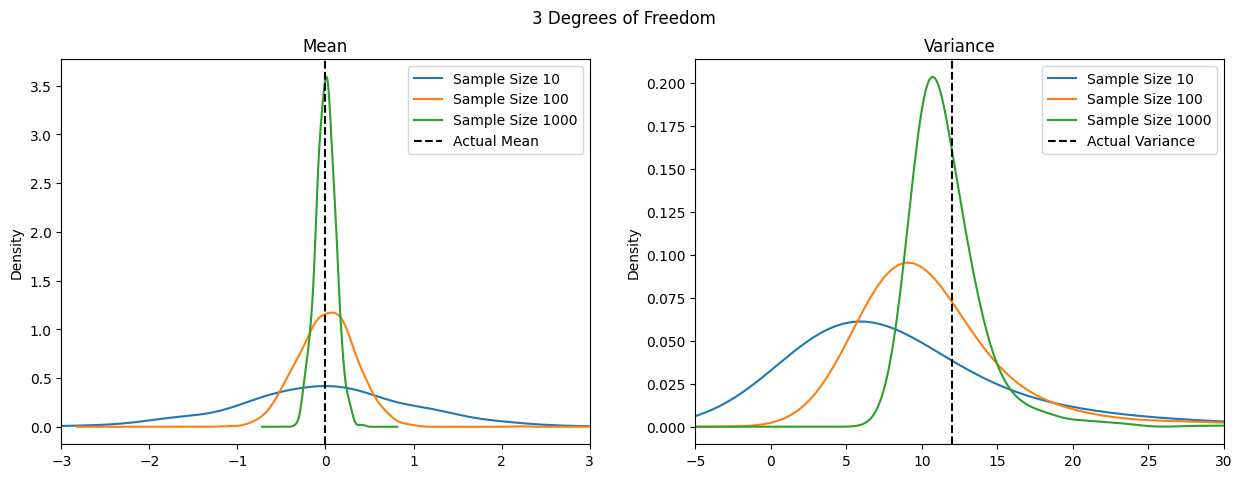

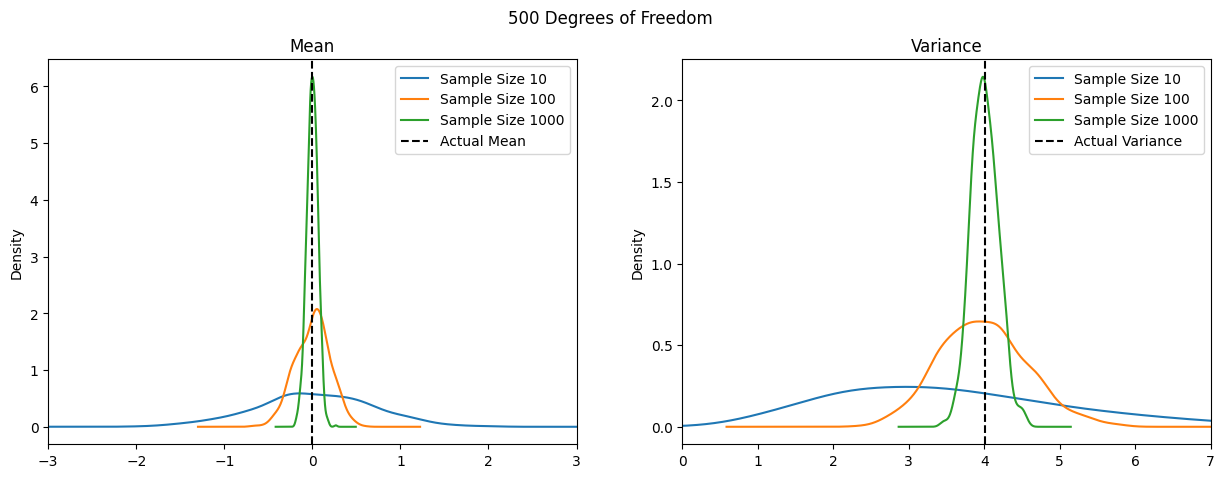

In [11]:
# Sample sizes to test
sample_sizes = [10, 100, 1000]
num_samples = 1000
variance_xlims = [
    (-500, 500),
    (-5, 30),
    (0, 7),
]
for student_t, dof, variance_xlim in zip(
    student_ts, degrees_of_freedom, variance_xlims
):
    actual_mean, actual_variance = student_t.rv_frozen.stats("mv")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sample_variances = []
    for sample_size in sample_sizes:
        samples = student_t.rvs((num_samples, sample_size))

        pd.Series(samples.mean(axis=1)).plot.kde(
            label=f"Sample Size {sample_size}", ax=ax[0]
        )
        pd.Series(samples.var(axis=1)).plot.kde(
            label=f"Sample Size {sample_size}", ax=ax[1]
        )

    ax[0].axvline(
        actual_mean, color="black", linestyle="dashed", label=f"Actual Mean"
    )
    ax[1].axvline(
        actual_variance,
        color="black",
        linestyle="dashed",
        label=f"Actual Variance",
    )
    ax[0].set_xlim(-3, 3)
    ax[1].set_xlim(variance_xlim)
    ax[0].set_title("Mean")
    ax[1].set_title("Variance")
    ax[0].legend()
    ax[1].legend()
    fig.suptitle(f"{dof} Degrees of Freedom")
    plt.show()

**Key Observations**

1. For the mean, we observe the same pattern as with the SkewNormal distribution. However, as the degrees of freedom increase, fewer samples are needed to converge to a distribution tightly centered around the true mean.  

2. For the variance, the behavior differs.  
   - With 2 degrees of freedom, the variance is theoretically infinite, making it unstable regardless of sample size.  
   - For degrees of freedom > 2, the variance is defined and stabilizes with more samples. However, even with 1000 samples, we struggle to estimate variance accurately for df = 3, while for df = 500, even 100 samples provide a good approximation.  

In [12]:
# REMEMBER, FILL THE README!!!